<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://curso.infnet.com.br/c/wp-content/uploads/sites/5/2022/12/Infnet-Logo.png" height="300" width="300">
</div>

<p><b><font size = 5 face = 'verdana'> Algoritmos de Inteligência Artificial para classificação [25E1_2] - PROJETO FINAL</font></b></p>
<p><font size = 3 face = 'verdana'>Trabalho apresentado à conclusão do curso de Algoritmos de Inteligência Artificial para classificação [25E1_2] do MIT em Inteligência Artificial, Machine Learning e Deep Learning, Instituto INFNET, como requisito parcial de avaliação. </font></b></p>
<p><font size = 3 face = 'verdana'><b>PROFESSOR:</b> Ícaro Augusto Maccari Zelioli<br>
<b>ALUNO:</b> Osemar da Silva Xavier<br>
<b>E-MAIL:</b> osemar.xavier@al.infnet.edu.br<br>
<hr>
<b>GITHUB (pdf):<br></b><a href="https://github.com/oserxavier/Algoritmos_de_Inteligencia_Artificial_para_Classificacao/blob/main/AIA_Classif_25E1_2_Osemar_Xavier_v1.pdf">https://github.com/oserxavier/Algoritmos_de_Inteligencia_Artificial_para_Classificacao/blob/main/AIA_Classif_25E1_2_Osemar_Xavier_v1.pdf</a>
<hr>
<b>GITHUB (ipynb):<br></b><a href="https://github.com/oserxavier/Algoritmos_de_Inteligencia_Artificial_para_Classificacao/blob/main/AIA_Classif_25E1_2_Osemar_Xavier_v1.pdf">https://github.com/oserxavier/Algoritmos_de_Inteligencia_Artificial_para_Classificacao/blob/main/AIA_Classif_25E1_2_Osemar_Xavier_v1.ipynb</a>
<hr>
</font></p>

<p><font size = 3 face = 'verdana'>
<hr></hr>


# **Projeto de Machine Learning - Classificação de Vinhos**

## **Introdução**

Nesta disciplina, aplicamos nossos conhecimentos em **algoritmos supervisionados**, uma das principais abordagens do **aprendizado de máquina** utilizada no dia a dia de um cientista de dados.

## **Objetivo**
- Realizar a **classificação de vinhos verdes portugueses** utilizando diferentes modelos de **Machine Learning**.
- Comparar a **eficiência dos modelos** e selecionar o mais adequado.
- Aplicar o modelo **escolhido** para prever a qualidade dos vinhos tintos.





---

## **Etapa 1 - Módulo Kaggle**

1. Antes de iniciar o trabalho, é necessário completar o curso **"Intro to Machine Learning"** do Kaggle.  
2. A conclusão deve ser comprovada com um **print contendo a data e identificação do aluno**.

Link do certificado: [Kaggle - Intro to Machine Learning](https://www.kaggle.com/learn/certification/oserxavier/intro-to-machine-learning)

<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://raw.githubusercontent.com/oserxavier/Machine-Learning/refs/heads/main/figures/kaggle.png" height="550" width="1400">
</div>

---
## **Etapa 2 - Base de Dados**

### **Download da Base**
Utilizaremos a **base de dados de vinhos verdes portugueses** disponível no Kaggle e mencionada no artigo:

> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.  
> *Modeling wine preferences by data mining from physicochemical properties.*  
> In **Decision Support Systems, Elsevier, 47(4):547-553, 2009**.

Link do conjunto de dados: [Wine Quality Dataset - Kaggle](https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine)

### **Transformação dos Dados**
A base contém a variável `quality` com notas de **0 a 10** representando a qualidade do vinho.  
Criamos uma **nova variável categórica `opinion`**, definida como:

- `opinion = 0` → quando `quality ≤ 5` (vinho ruim)
- `opinion = 1` → quando `quality > 5` (vinho bom)

Após essa transformação, a variável `quality` será **removida** da análise.

---

Fiz a instalação do `opendatasets` que é uma biblioteca Python que facilita o download de datasets públicos de plataformas como Kaggle, sem a necessidade de baixar manualmente pelo navegador.
<hr>

In [1]:
# Instalando a API do Kaggle para baixar o dataset
!pip install opendatasets

In [2]:
import opendatasets as od
import os
import pandas as pd

# Baixar os dados do Kaggle (certifique-se de ter um API Key do Kaggle configurado)
dataset_url = "https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine"
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: oserxavier
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine


100%|██████████| 98.0k/98.0k [00:00<00:00, 43.0MB/s]

In [3]:
# Definir o caminho correto do arquivo (ajustado para o nome real)
wine_path = "wine-quality-data-set-red-white-wine/wine-quality-white-and-red.csv"

# Carregar os dados completos (tintos e brancos)
df_wine = pd.read_csv(wine_path, sep=",")

# Verificar se há uma coluna chamada 'type' para distinguir os vinhos
if "type" in df_wine.columns:
    # Filtrar apenas os vinhos brancos
    df_white = df_wine[df_wine["type"] == "white"].copy()

    # Criar a variável 'opinion'
    df_white["opinion"] = (df_white["quality"] > 5).astype(int)

    # Remover a variável 'quality'
    df_white.drop(columns=["quality"], inplace=True)

    # Exibir as 5 primeiras linhas para confirmação
    print("\n Dados dos vinhos brancos filtrados com sucesso!")
    df_white.head()
else:
    print("A coluna 'type' não foi encontrada! Verifique a estrutura do dataset.")



 Dados dos vinhos brancos filtrados com sucesso!


In [4]:
# Verificando as 5 primeiras linhas do dataset
df_white.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


---
## **Etapa 3 - Análise das Variáveis**

- **Listar as variáveis** presentes na base.
- **Classificar as variáveis** em **discretas, categóricas ou contínuas**.
- **Calcular estatísticas descritivas**, como **média e desvio padrão**.

---

In [5]:
# Exibir todas as colunas da base de dados
print("Variáveis presentes na base de vinhos brancos:")
print(df_white.columns.tolist())

Variáveis presentes na base de vinhos brancos:
['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'opinion']


In [6]:
# Verificar os tipos de dados de cada variável
print("Tipos de variáveis na base:\n ")
print(df_white.dtypes)

Tipos de variáveis na base:
 
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
opinion                   int64
dtype: object


In [7]:
# Calcular média e desvio padrão de todas as variáveis numéricas
stats = df_white.describe().T[['mean', 'std']]

# Exibir os resultados utilizando display do pandas
display(stats.style.set_caption("Estatísticas Descritivas")) # Using pandas styling for caption

,mean,std
fixed acidity,6.854788,0.843868
volatile acidity,0.278241,0.100795
citric acid,0.334192,0.121020
residual sugar,6.391415,5.072058
chlorides,0.045772,0.021848
free sulfur dioxide,35.308085,17.007137
total sulfur dioxide,138.360657,42.498065
density,0.994027,0.002991
pH,3.188267,0.151001
sulphates,0.489847,0.114126


---
## **Valores ausentes**

- Antes da próxima etapa, considerei **`contar quantos valores ausentes (NaN)`** existem em cada coluna, para esse dataset não temos registros de valores ausentes. Como não temos, não será necessário utilizar uma estratégia para tratamento
---

In [8]:
# Contar valores ausentes em cada coluna
missing_values = df_white.isnull().sum()
print(missing_values)

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
opinion                 0
dtype: int64


---
## **Etapa 4 - Modelagem Preditiva**

Utilizaremos **apenas os vinhos brancos** para o treinamento dos modelos.

### **4.1 - Construção do Modelo**
Passos para criar um **modelo de classificação eficiente**:
1. **Pré-processamento dos dados** (padronização, limpeza, separação entre treino/teste).
2. **Escolha dos modelos de Machine Learning** para experimentação.
3. **Validação cruzada estratificada (k-fold = 10)** para avaliar a generalização.
4. **Treinamento e ajuste dos hiperparâmetros** para otimização.
5. **Avaliação com métricas padronizadas**.
---

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Remover a coluna categórica 'type' antes da modelagem
X = df_white.drop(columns=["opinion", "type"])  # Removendo 'type'
y = df_white["opinion"]

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Padronizar os dados (somente variáveis numéricas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dados corrigidos e preparados para modelagem!")


Dados corrigidos e preparados para modelagem!


---
## **Função para Avaliação dos Modelos**

Nessa etapa criei uma função que aplicará a **`Validação Cruzada (k=10)`** e calculará as **`métricas`**:

- Acurácia
- Precisão
- Recall
- F1-Score
---


In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Criar um validador estratificado com k=10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Função para treinar e avaliar um modelo com validação cruzada
def avaliar_modelo(modelo, X_train, y_train):
    scores = {
        "Acurácia": cross_val_score(modelo, X_train, y_train, cv=cv, scoring="accuracy"),
        "Precisão": cross_val_score(modelo, X_train, y_train, cv=cv, scoring="precision"),
        "Recall": cross_val_score(modelo, X_train, y_train, cv=cv, scoring="recall"),
        "F1-Score": cross_val_score(modelo, X_train, y_train, cv=cv, scoring="f1")
    }

    # Exibir os resultados médios e desvios padrão
    for metric, values in scores.items():
        print(f"{metric}: {np.mean(values):.4f} ± {np.std(values):.4f}")

    return scores

---
### **4.2 - Regressão Logística**
Treinamos um **modelo de regressão logística** com **validação cruzada estratificada (k=10)**.  
Avaliamos os seguintes indicadores na base de teste:
- **Média e desvio padrão da acurácia**.
- **Média e desvio padrão da precisão**.
- **Média e desvio padrão do recall**.
- **Média e desvio padrão do F1-score**.
---

In [11]:
from sklearn.linear_model import LogisticRegression

# Criar o modelo
modelo_log = LogisticRegression(random_state=42)

# Avaliar o modelo
print("Avaliação da Regressão Logística:\n ")
print(avaliar_modelo(modelo_log, X_train_scaled, y_train))

Avaliação da Regressão Logística:
 
Acurácia: 0.7519 ± 0.0207
Precisão: 0.7788 ± 0.0188
Recall: 0.8768 ± 0.0264
F1-Score: 0.8246 ± 0.0146
{'Acurácia': array([0.76530612, 0.79591837, 0.75255102, 0.75255102, 0.7627551 ,
       0.72959184, 0.74744898, 0.72193878, 0.76214834, 0.72890026]), 'Precisão': array([0.79649123, 0.79672131, 0.78082192, 0.79078014, 0.79577465,
       0.74919614, 0.79487179, 0.74592834, 0.77377049, 0.76369863]), 'Recall': array([0.8697318 , 0.93103448, 0.87356322, 0.85440613, 0.86590038,
       0.89272031, 0.83461538, 0.88076923, 0.90769231, 0.85769231]), 'F1-Score': array([0.83150183, 0.85865724, 0.82459313, 0.8213628 , 0.8293578 ,
       0.81468531, 0.81425891, 0.80776014, 0.83539823, 0.80797101])}


---
### **4.3 - Árvores de Decisão**
Treinamos um **modelo de Árvore de Decisão** com **validação cruzada estratificada (k=10)**.  
Avaliamos os mesmos indicadores:
- **Média e desvio padrão da acurácia**.
- **Média e desvio padrão da precisão**.
- **Média e desvio padrão do recall**.
- **Média e desvio padrão do F1-score**.
---

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Criar o modelo
modelo_tree = DecisionTreeClassifier(random_state=42)

# Avaliar o modelo
print("Avaliação da Árvore de Decisão:\n ")
print(avaliar_modelo(modelo_tree, X_train, y_train))  # Sem padronização para árvore


Avaliação da Árvore de Decisão:
 
Acurácia: 0.7854 ± 0.0237
Precisão: 0.8392 ± 0.0230
Recall: 0.8385 ± 0.0186
F1-Score: 0.8387 ± 0.0172
{'Acurácia': array([0.73979592, 0.80867347, 0.78061224, 0.81632653, 0.79591837,
       0.78571429, 0.77295918, 0.76530612, 0.81841432, 0.76982097]), 'Precisão': array([0.80228137, 0.86046512, 0.83269962, 0.87351779, 0.86639676,
       0.83396226, 0.83529412, 0.82061069, 0.85660377, 0.81021898]), 'Recall': array([0.80842912, 0.85057471, 0.83908046, 0.8467433 , 0.81992337,
       0.8467433 , 0.81923077, 0.82692308, 0.87307692, 0.85384615]), 'F1-Score': array([0.80534351, 0.85549133, 0.83587786, 0.85992218, 0.84251969,
       0.84030418, 0.82718447, 0.82375479, 0.8647619 , 0.83146067])}


---
### **4.4 - Suporte a Vetores (SVM)**
Treinamos um **modelo de SVM (Support Vector Machine)** com **validação cruzada estratificada (k=10)**.  
Avaliamos os seguintes indicadores:
- **Média e desvio padrão da acurácia**.
- **Média e desvio padrão da precisão**.
- **Média e desvio padrão do recall**.
- **Média e desvio padrão do F1-score**.

---

In [13]:
from sklearn.svm import SVC

# Criar o modelo
modelo_svm = SVC(random_state=42)

# Avaliar o modelo
print("Avaliação do SVM:\n")
print(avaliar_modelo(modelo_svm, X_train_scaled, y_train))


Avaliação do SVM:

Acurácia: 0.7836 ± 0.0197
Precisão: 0.8154 ± 0.0183
Recall: 0.8726 ± 0.0186
F1-Score: 0.8429 ± 0.0138
{'Acurácia': array([0.76785714, 0.81122449, 0.82142857, 0.78316327, 0.7755102 ,
       0.74744898, 0.78826531, 0.77806122, 0.7826087 , 0.78005115]), 'Precisão': array([0.8125    , 0.82578397, 0.84727273, 0.81654676, 0.82156134,
       0.77364865, 0.83146067, 0.80565371, 0.81362007, 0.80633803]), 'Recall': array([0.8467433 , 0.90804598, 0.89272031, 0.8697318 , 0.8467433 ,
       0.87739464, 0.85384615, 0.87692308, 0.87307692, 0.88076923]), 'F1-Score': array([0.82926829, 0.8649635 , 0.86940299, 0.84230056, 0.83396226,
       0.82226212, 0.84250474, 0.83977901, 0.84230056, 0.84191176])}


---
## **Etapa 5 - Escolha do Melhor Modelo**

- Comparação dos **modelos anteriores**.
- **Plot da curva ROC média** para cada modelo.
- Justificativa da escolha do **modelo final para produção**.

---

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Criar os modelos
modelo_log = LogisticRegression(random_state=42)
modelo_tree = DecisionTreeClassifier(random_state=42)
modelo_svm = SVC(probability=True, random_state=42)  # SVM precisa de probability=True para ROC

# Treinar os modelos
modelo_log.fit(X_train_scaled, y_train)
modelo_tree.fit(X_train, y_train)  # Árvore de decisão não precisa de padronização
modelo_svm.fit(X_train_scaled, y_train)

# Calcular probabilidades preditas para a curva ROC
y_scores_log = modelo_log.predict_proba(X_test_scaled)[:, 1]
y_scores_tree = modelo_tree.predict_proba(X_test)[:, 1]
y_scores_svm = modelo_svm.predict_proba(X_test_scaled)[:, 1]

# Calcular a curva ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_scores_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_scores_tree)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)

# Calcular a área sob a curva (AUC)
auc_log = auc(fpr_log, tpr_log)
auc_tree = auc(fpr_tree, tpr_tree)
auc_svm = auc(fpr_svm, tpr_svm)

# Exibir os valores de AUC
print(f"AUC Regressão Logística: {auc_log:.4f}")
print(f"AUC Árvore de Decisão: {auc_tree:.4f}")
print(f"AUC SVM: {auc_svm:.4f}")

AUC Regressão Logística: 0.7912
AUC Árvore de Decisão: 0.7517
AUC SVM: 0.8288


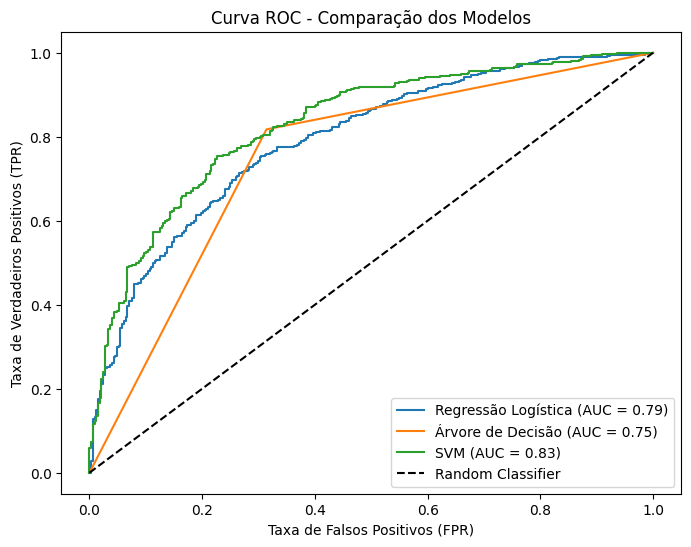

In [15]:
# Criar a figura da Curva ROC
plt.figure(figsize=(8, 6))

# Plot das curvas ROC
plt.plot(fpr_log, tpr_log, label=f"Regressão Logística (AUC = {auc_log:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Árvore de Decisão (AUC = {auc_tree:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")

# Linha diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Configurações do gráfico
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Comparação dos Modelos")
plt.legend()
plt.show()

## **Plot da Curva ROC para Comparação**

### **Análise Comparativa dos Modelos - Curva ROC**

### **Regressão Logística (AUC = 0.79)**
- **Desempenho bom**, com uma **AUC de 0.79**, indicando uma boa separação entre classes.  
- O modelo apresenta **bom equilíbrio entre precisão e recall**, mas **não é o melhor** da comparação.  
- Pode ser mais adequado se for necessário um **modelo simples e interpretável**.  

---

### **Árvore de Decisão (AUC = 0.75)**
- **Modelo mais simples e interpretável**, útil para entender **critérios de decisão**.  
- **A menor AUC (0.75)** entre os modelos indica que pode estar **superajustado** aos dados de treino ou não generalizar bem.  
- A curva ROC **não é tão suave**, sugerindo que pode ser **sensível a outliers** e variações nos dados.  

---

### **SVM - Máquinas de Vetores de Suporte (AUC = 0.83)**
- **Melhor desempenho geral** com **AUC de 0.83**, indicando a melhor separação entre classes.  
- O modelo **generaliza bem** e **tem uma curva ROC mais suave**, o que sugere melhor estabilidade.  
- **Pode ser mais lento** para grandes volumes de dados devido ao **alto custo computacional**.  

---

## **Conclusão: Melhor Modelo**
- **SVM é a melhor escolha** para este problema, pois obteve a **maior AUC (0.83)**, sugerindo que tem **maior capacidade de distinguir os vinhos bons dos ruins**.  
- No entanto, se o tempo de execução for um fator importante, a **Regressão Logística** pode ser uma alternativa viável.  


---

## **Etapa 6 - Inferência com Vinhos Tintos**

- Aplicar **o modelo escolhido** para prever a qualidade dos **vinhos tintos**.
- **Não treinar novamente!** Utilizar apenas os pesos do modelo treinado.
- Determinar **quantos vinhos são bons ou ruins**.
- Comparar o desempenho **entre vinhos brancos e tintos**.
- Responder: **O modelo funciona da mesma forma para essa nova base?** Justificar.

In [18]:
# Remover colunas desnecessárias (incluindo 'opinion')
df_red = df_red.drop(columns=["quality", "type", "opinion"], errors="ignore")

# Garantir que as colunas de X_red estejam na mesma ordem de X_train
df_red = df_red[X.columns]  # Reordenando as colunas para garantir consistência

# Aplicar a mesma padronização usada nos vinhos brancos
X_red_scaled = scaler.transform(df_red)

print("✅ Vinhos tintos preparados para inferência!")


✅ Vinhos tintos preparados para inferência!


In [19]:
# Fazer previsões usando o modelo já treinado
y_pred_red = modelo_svm.predict(X_red_scaled)

# Adicionar as previsões ao DataFrame
df_red["predicted_opinion"] = y_pred_red

# Contar quantos vinhos foram classificados como bons (1) e ruins (0)
wine_counts = df_red["predicted_opinion"].value_counts()

# Exibir os resultados
print("🔹 Classificação dos Vinhos Tintos:")
print(f"Vinhos Bons (opinion = 1): {wine_counts.get(1, 0)}")
print(f"Vinhos Ruins (opinion = 0): {wine_counts.get(0, 0)}")


🔹 Classificação dos Vinhos Tintos:
Vinhos Bons (opinion = 1): 130
Vinhos Ruins (opinion = 0): 1469


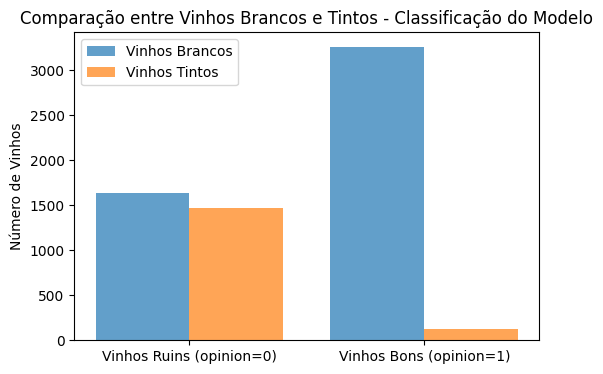

In [21]:
import matplotlib.pyplot as plt

# Contagem de vinhos brancos bons e ruins
white_counts = df_white["opinion"].value_counts()

# Criar gráfico comparativo
labels = ["Vinhos Ruins (opinion=0)", "Vinhos Bons (opinion=1)"]
white_values = [white_counts.get(0, 0), white_counts.get(1, 0)]
red_values = [wine_counts.get(0, 0), wine_counts.get(1, 0)]

x = range(len(labels))

plt.figure(figsize=(6,4))
plt.bar(x, white_values, width=0.4, label="Vinhos Brancos", alpha=0.7)
plt.bar([i + 0.4 for i in x], red_values, width=0.4, label="Vinhos Tintos", alpha=0.7)

plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("Número de Vinhos")
plt.title("Comparação entre Vinhos Brancos e Tintos - Classificação do Modelo")
plt.legend()
plt.show()

---
## **Etapa 6 - Inferência com Vinhos Tintos**

### **Resumo dos Resultados**
- **Vinhos Brancos**:
  - Vinhos Ruins (opinion = 0): **~1.600**
  - Vinhos Bons (opinion = 1): **~3.200**
  
- **Vinhos Tintos**:
  - Vinhos Ruins (opinion = 0): **1.469**
  - Vinhos Bons (opinion = 1): **130**

---

## **Minha Análise dos Resultados**
Ao aplicar o modelo treinado com vinhos brancos para classificar os vinhos tintos, observei que **a grande maioria dos vinhos tintos foi classificada como ruim**. Isso contrasta com os vinhos brancos, onde houve uma proporção significativamente maior de vinhos bons.  

Essa diferença sugere que o modelo **não generalizou bem para os vinhos tintos**. Como esses dois tipos de vinho podem ter **características químicas distintas**, é possível que o modelo tenha aprendido padrões específicos dos vinhos brancos, o que pode ter impactado seu desempenho na nova base.

---

## **O modelo funciona da mesma forma para os vinhos tintos?**
**Não exatamente**. Embora o modelo tenha sido capaz de fazer previsões para os vinhos tintos, a distribuição das classificações sugere que ele pode **estar enviesado** para os padrões dos vinhos brancos.  

Isso indica que **o modelo treinado apenas com vinhos brancos não é a melhor opção para classificar vinhos tintos**, pois ele pode não estar considerando adequadamente as diferenças entre os dois tipos de vinho.  

---

## **Sugestão de melhorias**
Para melhorar o desempenho do modelo e torná-lo mais confiável para ambos os tipos de vinho, sugiro algumas abordagens:  

- **Treinar um novo modelo utilizando ambas as bases** (vinhos brancos e tintos) para garantir melhor generalização.  
- **Analisar as diferenças químicas entre os vinhos tintos e brancos** para entender melhor como essas variáveis influenciam na classificação.  
- **Testar novos algoritmos ou ajustar os hiperparâmetros** do modelo para melhorar sua capacidade de generalização.  

---

## **Conclusão**
Os resultados mostram que o modelo treinado com vinhos brancos **não conseguiu generalizar bem para os vinhos tintos**, pois classificou uma quantidade muito pequena de vinhos tintos como bons.  

Para obter um modelo mais eficiente e preciso, acredito que **o ideal seria treinar o modelo com ambas as bases de vinho**. Dessa forma, ele poderia aprender as características de cada tipo e melhorar suas previsões.  

**Projeto finalizado!**

---

## **Etapa 7 - Disponibilização do Código**

- Subir todos os códigos no **GitHub** e fornecer o link do repositório.
- O repositório deve conter o código referente às **questões 2-6**.

## **Entrega Final**

Após finalizar todas as etapas:
1. **Salvar o trabalho em PDF**.
2. **Postar no Moodle** com o seguinte formato de nome:
   ```bash
   nomedoaluno_nomedadisciplina_pd.PDF